In [204]:
# Importing necessary packages

import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15,8
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [8]:
# Setting maximum column numbers

pd.set_option('display.max_columns', 1000)

In [9]:
# Setting maximum row numbers

pd.set_option('display.max_rows', 1000)

In [85]:
# Reading Training data

data_train = pd.read_csv('train.csv')

In [86]:
data_train.head()

,cust_id,product_id,visit_date,campaign_category,prod_char_1,prod_char_2,prod_char_3,prod_char_4,prod_char_5,prod_char_6,prod_char_7,purchase
0,cust_1312,prod_cat2_831559,22/09/2017,type 5,NaN,NaN,NaN,NaN,NaN,NaN,cat 208,1
1,cust_1427,prod_cat2_4262088,05/08/2018,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 61,0
2,cust_8575,prod_cat2_2480790,15/10/2017,type 5,NaN,NaN,NaN,NaN,NaN,NaN,cat 433,1
3,cust_6737,prod_cat2_2142924,23/10/2017,type 5,NaN,NaN,NaN,NaN,NaN,NaN,cat 2114,0
4,cust_8169,prod_cat2_3877499,05/03/2018,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 2,0


In [87]:
data_train.shape

(77000, 12)

In [88]:
# Reading customer data

data_cus = pd.read_csv('customer.csv')

In [89]:
data_cus.head()

,cust_id,city,cust_group,cust_type,cust_approach_date,cust_attrb_1,cust_attrb_2,cust_attrb_3,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_8,cust_attrb_9,cust_attrb_10,cust_attrb_11,cust_attrb_12,cust_attrb_13,cust_attrb_14,cust_attrb_15,cust_attrb_16,cust_attrb_17,cust_attrb_18,cust_attrb_19,cust_attrb_20,cust_attrb_21,cust_attrb_22,cust_attrb_23,cust_attrb_24,cust_attrb_25,cust_attrb_26,cust_attrb_27,cust_attrb_28
0,cust_0,city 2,group 17304,type 2,21/04/2018,cat 4,cat 6,cat 4,cat 5,cat 22,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,cust_1,city 2,group 21731,type 3,25/02/2016,cat 21,cat 4,cat 3,cat 1,cat 1,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75
2,cust_2,city 2,group 48077,type 3,31/05/2018,cat 6,cat 8,cat 5,cat 5,cat 15,cat 2,cat 2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,87
3,cust_3,city 1,group 15391,type 1,29/09/2017,cat 4,cat 7,cat 4,cat 1,cat 2,cat 2,cat 2,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,0,0,0,1,1,89
4,cust_4,city 2,group 17304,type 2,16/02/2018,cat 5,cat 5,cat 5,cat 7,cat 14,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
data_cus.shape

(9442, 33)

In [91]:
# Reading Testing data

data_test = pd.read_csv('test_F9a0NJV.csv')

In [92]:
data_test.head()

,cust_id,product_id,visit_date,campaign_category,prod_char_1,prod_char_2,prod_char_3,prod_char_4,prod_char_5,prod_char_6,prod_char_7
0,cust_1,prod_cat2_2676021,30/06/18,type 5,NaN,NaN,NaN,NaN,NaN,NaN,cat 464
1,cust_1,prod_cat2_980859,03/05/18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 8
2,cust_100,prod_cat2_3003083,28/06/18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 8
3,cust_1002,prod_cat2_578323,29/07/18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 2
4,cust_1006,prod_cat1_312033,07/04/18,type 1,cat 2,cat 16,cat 4,cat 3,cat 2,cat 2,NaN


In [93]:
data_test.shape

(22431, 11)

In [94]:
# Merging Training with customer data

result_train = pd.merge(data_train,data_cus,on = 'cust_id',how = 'left')

In [95]:
result_train.head()

,cust_id,product_id,visit_date,campaign_category,prod_char_1,prod_char_2,prod_char_3,prod_char_4,prod_char_5,prod_char_6,prod_char_7,purchase,city,cust_group,cust_type,cust_approach_date,cust_attrb_1,cust_attrb_2,cust_attrb_3,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_8,cust_attrb_9,cust_attrb_10,cust_attrb_11,cust_attrb_12,cust_attrb_13,cust_attrb_14,cust_attrb_15,cust_attrb_16,cust_attrb_17,cust_attrb_18,cust_attrb_19,cust_attrb_20,cust_attrb_21,cust_attrb_22,cust_attrb_23,cust_attrb_24,cust_attrb_25,cust_attrb_26,cust_attrb_27,cust_attrb_28
0,cust_1312,prod_cat2_831559,22/09/2017,type 5,NaN,NaN,NaN,NaN,NaN,NaN,cat 208,1,city 2,group 18964,type 3,23/07/2015,cat 4,cat 2,cat 4,cat 2,cat 5,cat 8,cat 8,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,56
1,cust_1427,prod_cat2_4262088,05/08/2018,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 61,0,city 2,group 19488,type 3,08/09/2015,cat 7,cat 6,cat 7,cat 3,cat 11,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,86
2,cust_8575,prod_cat2_2480790,15/10/2017,type 5,NaN,NaN,NaN,NaN,NaN,NaN,cat 433,1,city 2,group 4442,type 3,14/10/2017,cat 11,cat 8,cat 5,cat 3,cat 8,cat 4,cat 4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73
3,cust_6737,prod_cat2_2142924,23/10/2017,type 5,NaN,NaN,NaN,NaN,NaN,NaN,cat 2114,0,city 2,group 17304,type 2,22/10/2017,cat 14,cat 6,cat 8,cat 1,cat 12,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
4,cust_8169,prod_cat2_3877499,05/03/2018,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 2,0,city 2,group 17304,type 2,11/11/2017,cat 17,cat 2,cat 5,cat 4,cat 13,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
result_train.shape

(77000, 44)

In [97]:
# Merging Testing with customer data

result_test = pd.merge(data_test,data_cus,on = 'cust_id',how = 'left')

In [98]:
result_test.head()

,cust_id,product_id,visit_date,campaign_category,prod_char_1,prod_char_2,prod_char_3,prod_char_4,prod_char_5,prod_char_6,prod_char_7,city,cust_group,cust_type,cust_approach_date,cust_attrb_1,cust_attrb_2,cust_attrb_3,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_8,cust_attrb_9,cust_attrb_10,cust_attrb_11,cust_attrb_12,cust_attrb_13,cust_attrb_14,cust_attrb_15,cust_attrb_16,cust_attrb_17,cust_attrb_18,cust_attrb_19,cust_attrb_20,cust_attrb_21,cust_attrb_22,cust_attrb_23,cust_attrb_24,cust_attrb_25,cust_attrb_26,cust_attrb_27,cust_attrb_28
0,cust_1,prod_cat2_2676021,30/06/18,type 5,NaN,NaN,NaN,NaN,NaN,NaN,cat 464,city 2,group 21731,type 3,25/02/2016,cat 21,cat 4,cat 3,cat 1,cat 1,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75
1,cust_1,prod_cat2_980859,03/05/18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 8,city 2,group 21731,type 3,25/02/2016,cat 21,cat 4,cat 3,cat 1,cat 1,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75
2,cust_100,prod_cat2_3003083,28/06/18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 8,city 2,group 40346,type 3,18/11/2017,cat 11,cat 7,cat 2,cat 1,cat 14,cat 4,cat 4,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,91
3,cust_1002,prod_cat2_578323,29/07/18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 2,city 2,group 35625,type 3,28/07/2018,cat 20,cat 6,cat 8,cat 3,cat 9,cat 2,cat 2,0,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1,91
4,cust_1006,prod_cat1_312033,07/04/18,type 1,cat 2,cat 16,cat 4,cat 3,cat 2,cat 2,NaN,city 2,group 17304,type 2,07/04/2018,cat 11,cat 2,cat 2,cat 4,cat 13,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
result_test.shape

(22431, 43)

## Exploratory Data Analysis

In [100]:
result_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77000 entries, 0 to 76999
Data columns (total 44 columns):
cust_id               77000 non-null object
product_id            77000 non-null object
visit_date            77000 non-null object
campaign_category     77000 non-null object
prod_char_1           6127 non-null object
prod_char_2           6127 non-null object
prod_char_3           6127 non-null object
prod_char_4           6127 non-null object
prod_char_5           6127 non-null object
prod_char_6           6127 non-null object
prod_char_7           70873 non-null object
purchase              77000 non-null int64
city                  77000 non-null object
cust_group            77000 non-null object
cust_type             77000 non-null object
cust_approach_date    77000 non-null object
cust_attrb_1          77000 non-null object
cust_attrb_2          77000 non-null object
cust_attrb_3          77000 non-null object
cust_attrb_4          77000 non-null object
cust_attrb_5      

In [113]:
# Checking for null values

result_train.isnull().sum()

cust_id                   0
product_id                0
campaign_category         0
prod_char_7            6127
purchase                  0
city                      0
cust_group                0
cust_type                 0
cust_attrb_1              0
cust_attrb_2              0
cust_attrb_3              0
cust_attrb_4              0
cust_attrb_5              0
cust_attrb_6              0
cust_attrb_7              0
cust_attrb_8              0
cust_attrb_9              0
cust_attrb_10             0
cust_attrb_11             0
cust_attrb_12             0
cust_attrb_13             0
cust_attrb_14             0
cust_attrb_15             0
cust_attrb_16             0
cust_attrb_17             0
cust_attrb_18             0
cust_attrb_19             0
cust_attrb_20             0
cust_attrb_21             0
cust_attrb_22             0
cust_attrb_23             0
cust_attrb_24             0
cust_attrb_25             0
cust_attrb_26             0
cust_attrb_27             0
cust_attrb_28       

In [102]:
# Converting datatypes into valid format

result_train['visit_date'] = pd.to_datetime(result_train['visit_date'])

In [103]:
result_train['cust_approach_date'] = pd.to_datetime(result_train['cust_approach_date'])

In [104]:
# Dropping columns with high null values

result_train.drop(['prod_char_1','prod_char_2','prod_char_3','prod_char_4','prod_char_5','prod_char_6'],axis = 1, inplace = True)

In [105]:
#result_train.shape

In [106]:
# Extracting date and month from datetime features

result_train['visit_date_'] = result_train['visit_date'].dt.day

In [107]:
result_train['visit_month'] = result_train['visit_date'].dt.month

In [108]:
result_train['cust_approach_date_'] = result_train['cust_approach_date'].dt.day

In [109]:
result_train['cust_approach_month'] = result_train['cust_approach_date'].dt.month

In [110]:
result_train.head()

,cust_id,product_id,visit_date,campaign_category,prod_char_7,purchase,city,cust_group,cust_type,cust_approach_date,cust_attrb_1,cust_attrb_2,cust_attrb_3,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_8,cust_attrb_9,cust_attrb_10,cust_attrb_11,cust_attrb_12,cust_attrb_13,cust_attrb_14,cust_attrb_15,cust_attrb_16,cust_attrb_17,cust_attrb_18,cust_attrb_19,cust_attrb_20,cust_attrb_21,cust_attrb_22,cust_attrb_23,cust_attrb_24,cust_attrb_25,cust_attrb_26,cust_attrb_27,cust_attrb_28,visit_date_,visit_month,cust_approach_date_,cust_approach_month
0,cust_1312,prod_cat2_831559,2017-09-22,type 5,cat 208,1,city 2,group 18964,type 3,2015-07-23,cat 4,cat 2,cat 4,cat 2,cat 5,cat 8,cat 8,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,56,22,9,23,7
1,cust_1427,prod_cat2_4262088,2018-05-08,type 3,cat 61,0,city 2,group 19488,type 3,2015-08-09,cat 7,cat 6,cat 7,cat 3,cat 11,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,86,8,5,9,8
2,cust_8575,prod_cat2_2480790,2017-10-15,type 5,cat 433,1,city 2,group 4442,type 3,2017-10-14,cat 11,cat 8,cat 5,cat 3,cat 8,cat 4,cat 4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,15,10,14,10
3,cust_6737,prod_cat2_2142924,2017-10-23,type 5,cat 2114,0,city 2,group 17304,type 2,2017-10-22,cat 14,cat 6,cat 8,cat 1,cat 12,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,23,10,22,10
4,cust_8169,prod_cat2_3877499,2018-05-03,type 3,cat 2,0,city 2,group 17304,type 2,2017-11-11,cat 17,cat 2,cat 5,cat 4,cat 13,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,11,11


In [111]:
# Dropping original datetime columns

result_train.drop(['visit_date','cust_approach_date'],axis = 1, inplace = True)

In [112]:
#result_train.shape

(77000, 40)

In [114]:
# Filling Null values

result_train['prod_char_7'].fillna(method = 'ffill',inplace = True)

In [116]:
# Checking for null values

#result_train.isnull().sum()

In [117]:
result_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77000 entries, 0 to 76999
Data columns (total 40 columns):
cust_id                77000 non-null object
product_id             77000 non-null object
campaign_category      77000 non-null object
prod_char_7            77000 non-null object
purchase               77000 non-null int64
city                   77000 non-null object
cust_group             77000 non-null object
cust_type              77000 non-null object
cust_attrb_1           77000 non-null object
cust_attrb_2           77000 non-null object
cust_attrb_3           77000 non-null object
cust_attrb_4           77000 non-null object
cust_attrb_5           77000 non-null object
cust_attrb_6           77000 non-null object
cust_attrb_7           77000 non-null object
cust_attrb_8           77000 non-null int64
cust_attrb_9           77000 non-null int64
cust_attrb_10          77000 non-null int64
cust_attrb_11          77000 non-null int64
cust_attrb_12          77000 non-null int

In [119]:
# Checking Cardinality
Counter(result_train['campaign_category'])

Counter({'type 5': 18948,
         'type 3': 9349,
         'type 4': 7503,
         'type 2': 34793,
         'type 1': 6127,
         'type 6': 162,
         'type 7': 118})

In [120]:
# Checking Cardinality
Counter(result_train['prod_char_7']) # High Cardinality

Counter({'cat 208': 9,
         'cat 61': 1558,
         'cat 433': 840,
         'cat 2114': 32,
         'cat 2': 4661,
         'cat 4': 26,
         'cat 489': 1091,
         'cat 1': 37879,
         'cat 143': 157,
         'cat 201': 206,
         'cat 7301': 2,
         'cat 1251': 130,
         'cat 2936': 16,
         'cat 839': 10,
         'cat 429': 7,
         'cat 237': 60,
         'cat 481': 617,
         'cat 76': 39,
         'cat 184': 23,
         'cat 490': 98,
         'cat 125': 30,
         'cat 4960': 14,
         'cat 4294': 6,
         'cat 3998': 38,
         'cat 1434': 50,
         'cat 1903': 21,
         'cat 7977': 18,
         'cat 3832': 72,
         'cat 697': 189,
         'cat 313': 37,
         'cat 198': 3,
         'cat 133': 35,
         'cat 846': 3,
         'cat 1452': 19,
         'cat 899': 589,
         'cat 4404': 31,
         'cat 629': 4,
         'cat 1069': 130,
         'cat 532': 14,
         'cat 9': 21,
         'cat 871': 67,
  

In [121]:
# Checking Cardinality
Counter(result_train['city'])

Counter({'city 2': 69100, 'city 1': 7900})

In [122]:
# Checking Cardinality
Counter(result_train['cust_group']) # High Cardinality

Counter({'group 18964': 16,
         'group 19488': 32,
         'group 4442': 17,
         'group 17304': 24829,
         'group 10235': 18,
         'group 7159': 188,
         'group 42325': 7,
         'group 5844': 3,
         'group 49': 133,
         'group 1552': 15,
         'group 25205': 17,
         'group 10250': 13,
         'group 5693': 163,
         'group 801': 124,
         'group 3702': 128,
         'group 24595': 14,
         'group 18460': 10,
         'group 88': 30,
         'group 38418': 75,
         'group 36958': 73,
         'group 17545': 23,
         'group 28576': 3,
         'group 667': 405,
         'group 2675': 165,
         'group 1482': 62,
         'group 36344': 410,
         'group 507': 45,
         'group 38409': 33,
         'group 43407': 2,
         'group 1553': 6,
         'group 18583': 129,
         'group 5955': 29,
         'group 37081': 32,
         'group 1895': 164,
         'group 10025': 69,
         'group 24508': 7,
        

In [123]:
# Checking Cardinality
Counter(result_train['cust_type'])

Counter({'type 3': 44271, 'type 2': 24829, 'type 1': 7900})

In [124]:
# Checking Cardinality
Counter(result_train['cust_attrb_1']) # High Cardinality

Counter({'cat 4': 9329,
         'cat 7': 5554,
         'cat 11': 4781,
         'cat 14': 72,
         'cat 17': 768,
         'cat 19': 1263,
         'cat 40': 22178,
         'cat 9': 3356,
         'cat 2': 6636,
         'cat 15': 2046,
         'cat 10': 962,
         'cat 6': 3520,
         'cat 31': 76,
         'cat 29': 322,
         'cat 5': 8532,
         'cat 8': 739,
         'cat 13': 216,
         'cat 39': 17,
         'cat 1': 2500,
         'cat 3': 343,
         'cat 24': 571,
         'cat 28': 306,
         'cat 16': 100,
         'cat 26': 259,
         'cat 20': 518,
         'cat 21': 475,
         'cat 18': 528,
         'cat 12': 716,
         'cat 23': 21,
         'cat 25': 33,
         'cat 27': 15,
         'cat 30': 173,
         'cat 32': 21,
         'cat 22': 32,
         'cat 33': 3,
         'cat 34': 8,
         'cat 41': 6,
         'cat 35': 5})

In [125]:
# Checking Cardinality
Counter(result_train['cust_attrb_2']) # High Cardinality

Counter({'cat 2': 6996,
         'cat 6': 18600,
         'cat 8': 2110,
         'cat 16': 720,
         'cat 25': 22178,
         'cat 7': 7410,
         'cat 3': 1321,
         'cat 5': 7974,
         'cat 15': 1711,
         'cat 9': 990,
         'cat 21': 228,
         'cat 22': 235,
         'cat 18': 356,
         'cat 1': 2500,
         'cat 14': 227,
         'cat 12': 988,
         'cat 10': 1258,
         'cat 4': 682,
         'cat 19': 113,
         'cat 13': 114,
         'cat 11': 170,
         'cat 20': 54,
         'cat 23': 20,
         'cat 24': 13,
         'cat 17': 32})

In [126]:
# Checking Cardinality
Counter(result_train['cust_attrb_3'])

Counter({'cat 4': 10191,
         'cat 7': 5480,
         'cat 5': 13455,
         'cat 8': 3621,
         'cat 9': 22178,
         'cat 6': 4341,
         'cat 2': 10328,
         'cat 3': 4906,
         'cat 1': 2500})

In [127]:
# Checking Cardinality
Counter(result_train['cust_attrb_4'])

Counter({'cat 2': 3548,
         'cat 3': 23252,
         'cat 1': 25823,
         'cat 4': 17843,
         'cat 6': 970,
         'cat 5': 5392,
         'cat 7': 172})

In [128]:
# Checking Cardinality
Counter(result_train['cust_attrb_5']) # High Cardinality

Counter({'cat 5': 2091,
         'cat 11': 5604,
         'cat 8': 10549,
         'cat 12': 3338,
         'cat 13': 3918,
         'cat 9': 7424,
         'cat 4': 3582,
         'cat 1': 6228,
         'cat 10': 1307,
         'cat 2': 3224,
         'cat 19': 2410,
         'cat 20': 2472,
         'cat 24': 3762,
         'cat 7': 2760,
         'cat 17': 2772,
         'cat 3': 1956,
         'cat 25': 597,
         'cat 22': 1068,
         'cat 16': 2560,
         'cat 6': 1446,
         'cat 23': 1243,
         'cat 14': 2371,
         'cat 18': 2334,
         'cat 15': 1605,
         'cat 21': 379})

In [129]:
# Checking Cardinality
Counter(result_train['cust_attrb_6'])

Counter({'cat 8': 3080,
         'cat 3': 28570,
         'cat 4': 5145,
         'cat 2': 25714,
         'cat 7': 2219,
         'cat 1': 4961,
         'cat 6': 4745,
         'cat 5': 2566})

In [130]:
# Checking Cardinality
Counter(result_train['cust_attrb_7'])

Counter({'cat 8': 3480,
         'cat 3': 30320,
         'cat 4': 5657,
         'cat 2': 20319,
         'cat 7': 2524,
         'cat 1': 4301,
         'cat 6': 4342,
         'cat 9': 3327,
         'cat 5': 2730})

#### Inference

-  Low cardinality features - 'city' and 'cust_type'
-  High cardinality features - 'campaign_category','prod_char_7','cust_group','cust_attrb_1' to 'cust_attrb_7'

In [131]:
# Dropping features with IDs only

result_train.drop(['cust_id','product_id'], axis = 1,inplace = True)

In [132]:
# Applying Label encoding to features having high cardinality

le = LabelEncoder()

In [133]:
result_train['campaign_category'] = le.fit_transform(result_train['campaign_category'])

In [134]:
result_train['prod_char_7'] = le.fit_transform(result_train['prod_char_7'])

In [135]:
result_train['cust_group'] = le.fit_transform(result_train['cust_group'])

In [136]:
result_train['cust_attrb_1'] = le.fit_transform(result_train['cust_attrb_1'])

In [137]:
result_train['cust_attrb_2'] = le.fit_transform(result_train['cust_attrb_2'])

In [138]:
result_train['cust_attrb_3'] = le.fit_transform(result_train['cust_attrb_3'])

In [139]:
result_train['cust_attrb_4'] = le.fit_transform(result_train['cust_attrb_4'])

In [140]:
result_train['cust_attrb_5'] = le.fit_transform(result_train['cust_attrb_5'])

In [141]:
result_train['cust_attrb_6'] = le.fit_transform(result_train['cust_attrb_6'])

In [142]:
result_train['cust_attrb_7'] = le.fit_transform(result_train['cust_attrb_7'])

In [144]:
# Applying Dummy Encoding to features having low cardinality

data1 = pd.get_dummies(result_train['city'])

In [145]:
data1.head()

,city 1,city 2
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [146]:
data2 = pd.get_dummies(result_train['cust_type'])

In [147]:
data2.head()

,type 1,type 2,type 3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [151]:
# Concating the above dataframes to the original dataframe

value_df = [result_train,data1,data2]

result_train_new = pd.concat(value_df,axis = 1)

In [152]:
result_train_new.head()

,campaign_category,prod_char_7,purchase,city,cust_group,cust_type,cust_attrb_1,cust_attrb_2,cust_attrb_3,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_8,cust_attrb_9,cust_attrb_10,cust_attrb_11,cust_attrb_12,cust_attrb_13,cust_attrb_14,cust_attrb_15,cust_attrb_16,cust_attrb_17,cust_attrb_18,cust_attrb_19,cust_attrb_20,cust_attrb_21,cust_attrb_22,cust_attrb_23,cust_attrb_24,cust_attrb_25,cust_attrb_26,cust_attrb_27,cust_attrb_28,visit_date_,visit_month,cust_approach_date_,cust_approach_month,city 1,city 2,type 1,type 2,type 3
0,4,585,1,city 2,843,type 3,30,11,3,1,20,7,7,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,56,22,9,23,7,0,1,0,0,1
1,2,1518,0,city 2,901,type 3,35,21,6,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,86,8,5,9,8,0,1,0,0,1
2,4,1203,1,city 2,2385,type 3,2,23,4,2,23,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,15,10,14,10,0,1,0,0,1
3,4,596,0,city 2,611,type 2,5,21,7,0,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,23,10,22,10,0,1,0,1,0
4,2,550,0,city 2,611,type 2,8,11,4,3,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,11,11,0,1,0,1,0


In [157]:
result_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77000 entries, 0 to 76999
Data columns (total 41 columns):
campaign_category      77000 non-null int32
prod_char_7            77000 non-null int32
purchase               77000 non-null int64
cust_group             77000 non-null int32
cust_attrb_1           77000 non-null int32
cust_attrb_2           77000 non-null int32
cust_attrb_3           77000 non-null int32
cust_attrb_4           77000 non-null int32
cust_attrb_5           77000 non-null int32
cust_attrb_6           77000 non-null int32
cust_attrb_7           77000 non-null int32
cust_attrb_8           77000 non-null int64
cust_attrb_9           77000 non-null int64
cust_attrb_10          77000 non-null int64
cust_attrb_11          77000 non-null int64
cust_attrb_12          77000 non-null int64
cust_attrb_13          77000 non-null int64
cust_attrb_14          77000 non-null int64
cust_attrb_15          77000 non-null int64
cust_attrb_16          77000 non-null int64
cust_attrb_

In [155]:
# Dropping original columns

result_train_new.drop(['city','cust_type'], axis = 1,inplace = True)

In [156]:
#result_train_new.shape

(77000, 41)

In [159]:
# Checking for Outliers
result_train_new.describe()

,campaign_category,prod_char_7,purchase,cust_group,cust_attrb_1,cust_attrb_2,cust_attrb_3,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_8,cust_attrb_9,cust_attrb_10,cust_attrb_11,cust_attrb_12,cust_attrb_13,cust_attrb_14,cust_attrb_15,cust_attrb_16,cust_attrb_17,cust_attrb_18,cust_attrb_19,cust_attrb_20,cust_attrb_21,cust_attrb_22,cust_attrb_23,cust_attrb_24,cust_attrb_25,cust_attrb_26,cust_attrb_27,cust_attrb_28,visit_date_,visit_month,cust_approach_date_,cust_approach_month,city 1,city 2,type 1,type 2,type 3
count,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000,77000.000000
mean,1.991039,494.375000,0.485481,1285.058364,24.582558,17.007364,4.699857,1.701701,12.673455,2.170805,2.554286,0.248961,0.225000,0.263727,0.376857,0.270143,0.280870,0.271870,0.300727,0.171506,0.299584,0.224909,0.298857,0.304753,0.325351,0.196390,0.368000,0.178584,0.238325,0.342052,0.291468,54.518688,16.043247,6.824390,16.047403,6.713325,0.102597,0.897403,0.102597,0.322455,0.574948
std,1.376697,603.417807,0.499792,894.853599,11.978194,5.789119,2.645156,1.399830,8.548687,1.666836,2.027990,0.432414,0.417585,0.440656,0.484602,0.444036,0.449427,0.444926,0.458577,0.376953,0.458079,0.417525,0.457760,0.460306,0.468509,0.397269,0.482264,0.383006,0.426061,0.474400,0.454441,34.582542,8.835838,3.392909,9.042874,3.332518,0.303434,0.303434,0.303434,0.467419,0.494354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,611.000000,11.000000,17.000000,3.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.750000,8.000000,4.000000,8.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,40.000000,0.000000,839.000000,31.000000,18.000000,4.000000,2.000000,12.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,16.000000,8.000000,15.000000,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1070.000000,1.000000,1987.000000,33.000000,21.000000,8.000000,3.000000,22.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,84.000000,24.000000,10.000000,25.000000,10.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,6.000000,1936.000000,1.000000,3159.000000,37.000000,24.000000,8.000000,6.000000,24.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,31.000000,12.000000,31.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
# Checking the number of classes

Counter(result_train_new['purchase'])

Counter({1: 37382, 0: 39618})

#### Inference

-  Classes are evenly distributed

## Modelling

In [164]:
# Selecting the list of predictors and target variables

X_train = result_train_new.drop(['purchase'], axis = 1)
y_train = result_train_new['purchase']

In [166]:
X_train.head()

,campaign_category,prod_char_7,cust_group,cust_attrb_1,cust_attrb_2,cust_attrb_3,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_8,cust_attrb_9,cust_attrb_10,cust_attrb_11,cust_attrb_12,cust_attrb_13,cust_attrb_14,cust_attrb_15,cust_attrb_16,cust_attrb_17,cust_attrb_18,cust_attrb_19,cust_attrb_20,cust_attrb_21,cust_attrb_22,cust_attrb_23,cust_attrb_24,cust_attrb_25,cust_attrb_26,cust_attrb_27,cust_attrb_28,visit_date_,visit_month,cust_approach_date_,cust_approach_month,city 1,city 2,type 1,type 2,type 3
0,4,585,843,30,11,3,1,20,7,7,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,56,22,9,23,7,0,1,0,0,1
1,2,1518,901,35,21,6,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,86,8,5,9,8,0,1,0,0,1
2,4,1203,2385,2,23,4,2,23,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,15,10,14,10,0,1,0,0,1
3,4,596,611,5,21,7,0,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,23,10,22,10,0,1,0,1,0
4,2,550,611,8,11,4,3,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,11,11,0,1,0,1,0


In [167]:
y_train.head()

0    1
1    0
2    1
3    0
4    0
Name: purchase, dtype: int64

In [170]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               purchase   No. Observations:                77000
Model:                            GLM   Df Residuals:                    76962
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29158.
Date:                Sat, 18 Jan 2020   Deviance:                       58315.
Time:                        10:17:02   Pearson chi2:                 5.24e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -10.9863   6.55e+04     -0.000      1.000   -1.28e+05    1.28e+05
campaign_category      -0.0295      0.010     -2.831      0.005      -0.050      -0.009
prod_char_7             0.0001    2.3e-05      5.208      0.000    7.47e-05       0.000
cust_group           6.902e-05   1.13e-05      6.132      0.000     4.7e-05    9.11e-05
cust_attrb_1            0.0072      0.001      7.126      0.000       0.005       0.009
cust_attrb_2           -0.0058      0.002     -3.357      0.001      -0.009      -0.002
cust_attrb_3           -0.0247      0.005     -5.342      0.000      -0.034      -0.016
cust_attrb_4           -0.1449      0.008    -17.892      0.000      -0.161      -0.129
cust_attrb_5           -0.0141      0.001    -11.699      0.000      -0.016      -0.012
cust_attrb_6           -0.0188      0.007     -2.552      0.011      -0.033      -0.004
cust_attrb_7            0.0493      0.006      8.157      0.000       0.037       0.061
cust_attrb_8           -0.1533      0.038     -3.998      0.000      -0.228      -0.078
cust_attrb_9            0.3877      0.039     10.036      0.000       0.312       0.463
cust_attrb_10          -0.0178      0.040     -0.442      0.659      -0.097       0.061
cust_attrb_11           0.5506      0.043     12.885      0.000       0.467       0.634
cust_attrb_12          -0.3779      0.038    -10.045      0.000      -0.452      -0.304
cust_attrb_13          -0.1866      0.039     -4.764      0.000      -0.263      -0.110
cust_attrb_14           0.0304      0.051      0.601      0.548      -0.069       0.130
cust_attrb_15           0.2972      0.038      7.763      0.000       0.222       0.372
cust_attrb_16           0.3732      0.036     10.490      0.000       0.303       0.443
cust_attrb_17          -0.1457      0.048     -3.032      0.002      -0.240      -0.052
cust_attrb_18          -0.3303      0.052     -6.335      0.000      -0.432      -0.228
cust_attrb_19           0.1033      0.044      2.374      0.018       0.018       0.189
cust_attrb_20           0.1169      0.046      2.551      0.011       0.027       0.207
cust_attrb_21          -0.5894      0.045    -13.195      0.000      -0.677      -0.502
cust_attrb_22          -0.5306      0.040    -13.165      0.000      -0.610      -0.452
cust_attrb_23           0.0866      0.028      3.093      0.002       0.032       0.142
cust_attrb_24          -0.3974      0.040     -9.883      0.000      -0.476      -0.319
cust_attrb_25           0.4298      0.039     11.001      0.000       0.353       0.506
cust_attrb_26          -0.1286      0.050     -2.587      0.010      -0.226      -0.031
cust_attrb_27           0.5919      0.056     10.594      0.000       0.482       0.701
cust_attrb_28           0.0179      0.001     29.853      0.000       0.017       0.019
vis

In [173]:
# Importing Logistic Regression model
logreg = LogisticRegression()

In [176]:
# Running RFE(Recursive Feature elimination technique) with 13 variables as output
rfe = RFE(logreg, 13)             
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [177]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True,  True,  True])

In [178]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('campaign_category', False, 24),
 ('prod_char_7', False, 27),
 ('cust_group', False, 28),
 ('cust_attrb_1', False, 22),
 ('cust_attrb_2', False, 23),
 ('cust_attrb_3', False, 20),
 ('cust_attrb_4', False, 7),
 ('cust_attrb_5', False, 19),
 ('cust_attrb_6', False, 15),
 ('cust_attrb_7', False, 14),
 ('cust_attrb_8', False, 12),
 ('cust_attrb_9', True, 1),
 ('cust_attrb_10', False, 17),
 ('cust_attrb_11', True, 1),
 ('cust_attrb_12', True, 1),
 ('cust_attrb_13', False, 4),
 ('cust_attrb_14', False, 13),
 ('cust_attrb_15', False, 6),
 ('cust_attrb_16', True, 1),
 ('cust_attrb_17', False, 10),
 ('cust_attrb_18', True, 1),
 ('cust_attrb_19', False, 11),
 ('cust_attrb_20', False, 8),
 ('cust_attrb_21', True, 1),
 ('cust_attrb_22', True, 1),
 ('cust_attrb_23', False, 5),
 ('cust_attrb_24', False, 2),
 ('cust_attrb_25', False, 3),
 ('cust_attrb_26', False, 9),
 ('cust_attrb_27', True, 1),
 ('cust_attrb_28', False, 18),
 ('visit_date_', False, 21),
 ('visit_month', False, 25),
 ('cust_approac

In [179]:
col = X_train.columns[rfe.support_]

In [180]:
# Columns excluded
X_train.columns[~rfe.support_]

Index(['campaign_category', 'prod_char_7', 'cust_group', 'cust_attrb_1',
       'cust_attrb_2', 'cust_attrb_3', 'cust_attrb_4', 'cust_attrb_5',
       'cust_attrb_6', 'cust_attrb_7', 'cust_attrb_8', 'cust_attrb_10',
       'cust_attrb_13', 'cust_attrb_14', 'cust_attrb_15', 'cust_attrb_17',
       'cust_attrb_19', 'cust_attrb_20', 'cust_attrb_23', 'cust_attrb_24',
       'cust_attrb_25', 'cust_attrb_26', 'cust_attrb_28', 'visit_date_',
       'visit_month', 'cust_approach_date_', 'cust_approach_month'],
      dtype='object')

In [181]:
X_train_sm = sm.add_constant(X_train[col])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [182]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

In [183]:
res = logm2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


In [184]:
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\ProgramData\Anaconda3\lib\site-p

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               purchase   No. Observations:                77000
Model:                            GLM   Df Residuals:                    76989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 18 Jan 2020   Deviance:                          nan
Time:                        10:24:50   Pearson chi2:                 6.66e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.881e+14   1.76e+12    163.988      0.000    2.85e+14    2.92e+14
cust_attrb_9      0.2794      0.034      8.260      0.000       0.213       0.346
cust_attrb_11     0.6038      0.032     18.720      0.000       0.541       0.667
cust_attrb_12    -0.4172      0.028    -15.127      0.000      -0.471      -0.363
cust_attrb_16     0.4597      0.031     14.741      0.000       0.399       0.521
cust_attrb_18    -0.6127      0.035    -17.375      0.000      -0.682      -0.544
cust_attrb_21    -0.3563      0.036     -9.949      0.000      -0.427      -0.286
cust_attrb_22    -0.4002      0.036    -11.000      0.000      -0.472      -0.329
cust_attrb_27     0.6406      0.039     16.529      0.000       0.565       0.717
city 1        -8.906e+13    7.8e+11   -114.178      0.000   -9.06e+13   -8.75e+13
city 2        -3.484e+14   1.24e+12   -281.524      0.000   -3.51e+14   -3.46e+14
type 1        -1.991e+14   9.77e+11   -203.752      0.000   -2.01e+14   -1.97e+14
type 2        -4.443e+15   2.99e+12  -1483.781      0.000   -4.45e+15   -4.44e+15
type 3         6.024e+13   2.99e+12     20.117      0.000    5.44e+13    6.61e+13
=================================================================================
"""

#### Inference

-  All p values are within range i.e., less than 0.05

In [185]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
5    0.0
6    1.0
7    0.0
8    1.0
9    1.0
dtype: float64

In [186]:
# Creating a separate dataframe to store original and predicted probabilities for training dataset
y_train_pred_final = pd.DataFrame({'purchase':y_train.values, 'purchase_prob':y_train_pred})

In [190]:
y_train_pred_final.head(50)

,purchase,purchase_prob
0,1,1.0
1,0,1.0
2,1,1.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,1.0
7,0,0.0
8,1,1.0
9,1,1.0


In [188]:
#Accuracy score(For training data)
accuracy_score(y_train_pred_final.purchase, y_train_pred_final.purchase_prob)

0.807935064935065

In [191]:
#Confusion Matrix(For training data)
Conf_Matrix_LOR = confusion_matrix(y_train_pred_final.purchase, y_train_pred_final.purchase_prob)
print(Conf_Matrix_LOR)

[[24829 14789]
 [    0 37382]]


In [201]:
#Classification report(For training data)
print(classification_report(y_train_pred_final.purchase, y_train_pred_final.purchase_prob))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77     39618
           1       0.72      1.00      0.83     37382

    accuracy                           0.81     77000
   macro avg       0.86      0.81      0.80     77000
weighted avg       0.86      0.81      0.80     77000



## Random Forest Classifier

In [205]:
#Calling the API
model_RF1 = RandomForestClassifier()

In [206]:
# Running RFE with 13 variables as output
rfe2 = RFE(model_RF1, 13)             
rfe2 = rfe2.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [207]:
rfe2.support_

array([False, False,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True])

In [208]:
list(zip(X_train.columns, rfe2.support_, rfe2.ranking_))

[('campaign_category', False, 5),
 ('prod_char_7', False, 4),
 ('cust_group', True, 1),
 ('cust_attrb_1', True, 1),
 ('cust_attrb_2', True, 1),
 ('cust_attrb_3', False, 2),
 ('cust_attrb_4', True, 1),
 ('cust_attrb_5', True, 1),
 ('cust_attrb_6', True, 1),
 ('cust_attrb_7', True, 1),
 ('cust_attrb_8', False, 23),
 ('cust_attrb_9', False, 21),
 ('cust_attrb_10', False, 13),
 ('cust_attrb_11', False, 10),
 ('cust_attrb_12', False, 24),
 ('cust_attrb_13', False, 19),
 ('cust_attrb_14', False, 18),
 ('cust_attrb_15', False, 8),
 ('cust_attrb_16', False, 16),
 ('cust_attrb_17', False, 22),
 ('cust_attrb_18', False, 28),
 ('cust_attrb_19', False, 17),
 ('cust_attrb_20', False, 7),
 ('cust_attrb_21', False, 12),
 ('cust_attrb_22', False, 20),
 ('cust_attrb_23', False, 6),
 ('cust_attrb_24', False, 9),
 ('cust_attrb_25', False, 15),
 ('cust_attrb_26', False, 25),
 ('cust_attrb_27', False, 14),
 ('cust_attrb_28', True, 1),
 ('visit_date_', True, 1),
 ('visit_month', True, 1),
 ('cust_approach_d

In [209]:
col2 = X_train.columns[rfe2.support_]

In [210]:
X_train.columns[~rfe2.support_]

Index(['campaign_category', 'prod_char_7', 'cust_attrb_3', 'cust_attrb_8',
       'cust_attrb_9', 'cust_attrb_10', 'cust_attrb_11', 'cust_attrb_12',
       'cust_attrb_13', 'cust_attrb_14', 'cust_attrb_15', 'cust_attrb_16',
       'cust_attrb_17', 'cust_attrb_18', 'cust_attrb_19', 'cust_attrb_20',
       'cust_attrb_21', 'cust_attrb_22', 'cust_attrb_23', 'cust_attrb_24',
       'cust_attrb_25', 'cust_attrb_26', 'cust_attrb_27', 'city 1', 'city 2',
       'type 1', 'type 2'],
      dtype='object')

In [211]:
# Assigning relevant columns
X_train = X_train[col2]

In [212]:
X_train.head()

,cust_group,cust_attrb_1,cust_attrb_2,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_28,visit_date_,visit_month,cust_approach_date_,cust_approach_month,type 3
0,843,30,11,1,20,7,7,56,22,9,23,7,1
1,901,35,21,2,2,2,2,86,8,5,9,8,1
2,2385,2,23,2,23,3,3,73,15,10,14,10,1
3,611,5,21,0,3,2,2,18,23,10,22,10,0
4,611,8,11,3,4,2,2,0,3,5,11,11,0


In [213]:
#Training
model_RF1.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
#Prediction on Training data
y2_train_pred = model_RF1.predict(X_train)

In [215]:
#Accuracy Score for Training data
accuracy_score(y_train,y2_train_pred)

0.9991428571428571

In [216]:
# Printing confusion matrix
Conf_Matrix_RF1 = confusion_matrix(y_train,y2_train_pred)
print(Conf_Matrix_RF1)

[[39582    36]
 [   30 37352]]


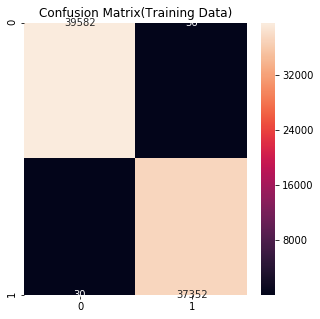

In [219]:
#Heatmap for Confusion matrix(Random Forest)
sb.heatmap(Conf_Matrix_RF1, annot=True,  fmt='');
title = 'Confusion Matrix(Training Data)'
plt.title(title);
rcParams['figure.figsize'] = 5,5

## Predictions on Test data

In [220]:
result_test.head()

,cust_id,product_id,visit_date,campaign_category,prod_char_1,prod_char_2,prod_char_3,prod_char_4,prod_char_5,prod_char_6,prod_char_7,city,cust_group,cust_type,cust_approach_date,cust_attrb_1,cust_attrb_2,cust_attrb_3,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_8,cust_attrb_9,cust_attrb_10,cust_attrb_11,cust_attrb_12,cust_attrb_13,cust_attrb_14,cust_attrb_15,cust_attrb_16,cust_attrb_17,cust_attrb_18,cust_attrb_19,cust_attrb_20,cust_attrb_21,cust_attrb_22,cust_attrb_23,cust_attrb_24,cust_attrb_25,cust_attrb_26,cust_attrb_27,cust_attrb_28
0,cust_1,prod_cat2_2676021,30/06/18,type 5,NaN,NaN,NaN,NaN,NaN,NaN,cat 464,city 2,group 21731,type 3,25/02/2016,cat 21,cat 4,cat 3,cat 1,cat 1,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75
1,cust_1,prod_cat2_980859,03/05/18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 8,city 2,group 21731,type 3,25/02/2016,cat 21,cat 4,cat 3,cat 1,cat 1,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75
2,cust_100,prod_cat2_3003083,28/06/18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 8,city 2,group 40346,type 3,18/11/2017,cat 11,cat 7,cat 2,cat 1,cat 14,cat 4,cat 4,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,91
3,cust_1002,prod_cat2_578323,29/07/18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,cat 2,city 2,group 35625,type 3,28/07/2018,cat 20,cat 6,cat 8,cat 3,cat 9,cat 2,cat 2,0,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1,91
4,cust_1006,prod_cat1_312033,07/04/18,type 1,cat 2,cat 16,cat 4,cat 3,cat 2,cat 2,NaN,city 2,group 17304,type 2,07/04/2018,cat 11,cat 2,cat 2,cat 4,cat 13,cat 3,cat 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [221]:
# Converting datatypes into valid format

result_test['visit_date'] = pd.to_datetime(result_test['visit_date'])

In [222]:
result_test['cust_approach_date'] = pd.to_datetime(result_test['cust_approach_date'])

In [223]:
# Dropping columns with high null values

result_test.drop(['prod_char_1','prod_char_2','prod_char_3','prod_char_4','prod_char_5','prod_char_6'],axis = 1, inplace = True)

In [224]:
# Extracting date and month from datetime features

result_test['visit_date_'] = result_test['visit_date'].dt.day

In [225]:
result_test['visit_month'] = result_test['visit_date'].dt.month

In [226]:
result_test['cust_approach_date_'] = result_test['cust_approach_date'].dt.day

In [227]:
result_test['cust_approach_month'] = result_test['cust_approach_date'].dt.month

In [228]:
# Dropping original datetime columns

result_test.drop(['visit_date','cust_approach_date'],axis = 1, inplace = True)

In [231]:
result_test.isnull().sum()

cust_id                0
product_id             0
campaign_category      0
prod_char_7            0
city                   0
cust_group             0
cust_type              0
cust_attrb_1           0
cust_attrb_2           0
cust_attrb_3           0
cust_attrb_4           0
cust_attrb_5           0
cust_attrb_6           0
cust_attrb_7           0
cust_attrb_8           0
cust_attrb_9           0
cust_attrb_10          0
cust_attrb_11          0
cust_attrb_12          0
cust_attrb_13          0
cust_attrb_14          0
cust_attrb_15          0
cust_attrb_16          0
cust_attrb_17          0
cust_attrb_18          0
cust_attrb_19          0
cust_attrb_20          0
cust_attrb_21          0
cust_attrb_22          0
cust_attrb_23          0
cust_attrb_24          0
cust_attrb_25          0
cust_attrb_26          0
cust_attrb_27          0
cust_attrb_28          0
visit_date_            0
visit_month            0
cust_approach_date_    0
cust_approach_month    0
dtype: int64

In [230]:
# Filling Null values

result_test['prod_char_7'].fillna(method = 'ffill',inplace = True)

In [232]:
# Checking for datatypes

result_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22431 entries, 0 to 22430
Data columns (total 39 columns):
cust_id                22431 non-null object
product_id             22431 non-null object
campaign_category      22431 non-null object
prod_char_7            22431 non-null object
city                   22431 non-null object
cust_group             22431 non-null object
cust_type              22431 non-null object
cust_attrb_1           22431 non-null object
cust_attrb_2           22431 non-null object
cust_attrb_3           22431 non-null object
cust_attrb_4           22431 non-null object
cust_attrb_5           22431 non-null object
cust_attrb_6           22431 non-null object
cust_attrb_7           22431 non-null object
cust_attrb_8           22431 non-null int64
cust_attrb_9           22431 non-null int64
cust_attrb_10          22431 non-null int64
cust_attrb_11          22431 non-null int64
cust_attrb_12          22431 non-null int64
cust_attrb_13          22431 non-null int

In [233]:
# Dropping features with IDs only

result_test.drop(['cust_id','product_id'], axis = 1,inplace = True)

In [234]:
# Applying Label encoding to features having high cardinality

le = LabelEncoder()

In [235]:
result_test['campaign_category'] = le.fit_transform(result_test['campaign_category'])

In [236]:
result_test['prod_char_7'] = le.fit_transform(result_test['prod_char_7'])

In [237]:
result_test['cust_group'] = le.fit_transform(result_test['cust_group'])

In [238]:
result_test['cust_attrb_1'] = le.fit_transform(result_test['cust_attrb_1'])

In [239]:
result_test['cust_attrb_2'] = le.fit_transform(result_test['cust_attrb_2'])

In [240]:
result_test['cust_attrb_3'] = le.fit_transform(result_test['cust_attrb_3'])

In [241]:
result_test['cust_attrb_4'] = le.fit_transform(result_test['cust_attrb_4'])

In [242]:
result_test['cust_attrb_5'] = le.fit_transform(result_test['cust_attrb_5'])

In [243]:
result_test['cust_attrb_6'] = le.fit_transform(result_test['cust_attrb_6'])

In [244]:
result_test['cust_attrb_7'] = le.fit_transform(result_test['cust_attrb_7'])

In [245]:
# Applying Dummy Encoding to features having low cardinality

data3 = pd.get_dummies(result_test['city'])

In [246]:
data3.head()

,city 1,city 2
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [247]:
data4 = pd.get_dummies(result_test['cust_type'])

In [248]:
data4.head()

,type 1,type 2,type 3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


In [249]:
# Concating the above dataframes to the original dataframe

value_df1 = [result_test,data3,data4]

result_test_new = pd.concat(value_df1,axis = 1)

In [251]:
# Dropping original columns

result_test_new.drop(['city','cust_type'], axis = 1,inplace = True)

In [252]:
result_test_new.head()

,campaign_category,prod_char_7,cust_group,cust_attrb_1,cust_attrb_2,cust_attrb_3,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_8,cust_attrb_9,cust_attrb_10,cust_attrb_11,cust_attrb_12,cust_attrb_13,cust_attrb_14,cust_attrb_15,cust_attrb_16,cust_attrb_17,cust_attrb_18,cust_attrb_19,cust_attrb_20,cust_attrb_21,cust_attrb_22,cust_attrb_23,cust_attrb_24,cust_attrb_25,cust_attrb_26,cust_attrb_27,cust_attrb_28,visit_date_,visit_month,cust_approach_date_,cust_approach_month,city 1,city 2,type 1,type 2,type 3
0,4,854,850,13,19,2,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,30,6,25,2,0,1,0,0,1
1,2,1217,850,13,19,2,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,5,3,25,2,0,1,0,0,1
2,2,1217,1714,2,22,1,0,5,3,3,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,91,28,6,18,11,0,1,0,0,1
3,2,370,1529,12,21,7,2,24,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1,91,29,7,28,7,0,1,0,0,1
4,0,370,460,2,11,1,3,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,4,7,0,1,0,1,0


In [253]:
# Choosing relevant columns
result_test_new = result_test_new[col2]

In [254]:
result_test_new.head()

,cust_group,cust_attrb_1,cust_attrb_2,cust_attrb_4,cust_attrb_5,cust_attrb_6,cust_attrb_7,cust_attrb_28,visit_date_,visit_month,cust_approach_date_,cust_approach_month,type 3
0,850,13,19,0,0,2,2,75,30,6,25,2,1
1,850,13,19,0,0,2,2,75,5,3,25,2,1
2,1714,2,22,0,5,3,3,91,28,6,18,11,1
3,1529,12,21,2,24,1,1,91,29,7,28,7,1
4,460,2,11,3,4,2,2,0,4,7,4,7,0


In [255]:
result_test_new.shape

(22431, 13)

In [256]:
#Prediction on Testing data
y2_test_predict = model_RF1.predict(result_test_new)

In [257]:
y2_test_predict

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## Sample Submission

In [258]:
# Creating a new dataframe for Sample submission
submissions = pd.DataFrame()

In [262]:
submissions = data_test.copy()

In [265]:
submissions = submissions[['cust_id']]

In [266]:
submissions.head()

,cust_id
0,cust_1
1,cust_1
2,cust_100
3,cust_1002
4,cust_1006


In [267]:
# Converting y_test_predict to a dataframe which is an array
y_pred_1 = pd.DataFrame(y2_test_predict)

In [268]:
y_pred_1.head()

,0
0,0
1,0
2,0
3,1
4,0


In [269]:
# Renaming the column 
y_pred_1 = y_pred_1.rename(columns={ 0 : 'purchase'})

In [270]:
y_pred_1.head()

,purchase
0,0
1,0
2,0
3,1
4,0


In [271]:
# Appending from 'y_pred_1' dataframe
submissions['purchase'] = y_pred_1[['purchase']]

In [272]:
submissions.head(15)

,cust_id,purchase
0,cust_1,0
1,cust_1,0
2,cust_100,0
3,cust_1002,1
4,cust_1006,0
5,cust_1006,0
6,cust_1007,1
7,cust_1007,1
8,cust_1007,1
9,cust_1007,1


In [274]:
# Creating sample submission file

filename = 'sample_submission_85njlT4.csv'

submissions.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: sample_submission_85njlT4.csv


In [275]:
! pip install pymongo